In [1]:
import pandas as pd

In [2]:
fruits = pd.read_csv("../Data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


In [3]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  49 non-null     float64
 1   weight  49 non-null     float64
 2   name    49 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


> fruits는 35개의 사과와 14개의 딸기 데이터로 구성되어 있음

In [5]:
apple = fruits[fruits.name == 'apple'] # fruits[0:35]
apple.tail()

,length,weight,name
30,38.5,920.0,apple
31,38.5,955.0,apple
32,39.5,925.0,apple
33,41.0,975.0,apple
34,41.0,950.0,apple


In [6]:
import matplotlib.pyplot as plt

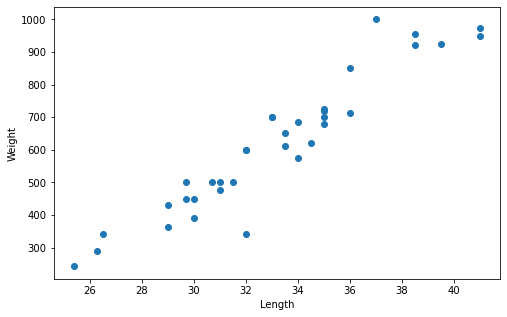

In [10]:
# apple에 대한 산포도 그리기

plt.figure(figsize=(8,5))

plt.scatter(
    apple['length'],
    apple['weight']
)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [13]:
# 딸기에 대한 산포도 그리기
berry = fruits[35:]
berry

,length,weight,name
35,9.8,6.7,berry
36,10.5,7.5,berry
37,10.6,7.0,berry
38,11.0,9.7,berry
39,11.2,9.8,berry
40,11.3,8.7,berry
41,11.8,10.0,berry
42,11.8,9.9,berry
43,12.0,9.8,berry
44,12.2,12.2,berry


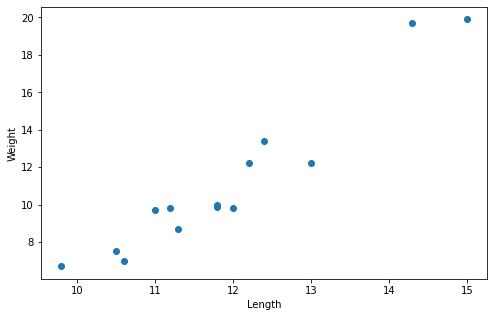

In [16]:
# 산포도 그리기

plt.figure(figsize=(8,5))

plt.scatter(
    berry['length'],
    berry['weight']
)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

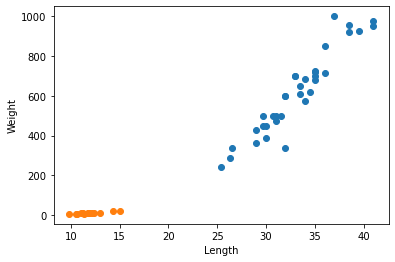

In [17]:
# 2개의 DataSet을 산포로 한꺼번에 비교하기

plt.scatter(apple.length,apple.weight)
plt.scatter(berry.length,berry.weight)

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

> 산포도를 보고 어떤 모델을 사용할지 결정해야 함. 위와 같은 경우에는 회귀선을 그릴 필요가 없이 데이터 구분 명확

---
# 머신러닝을 위한 데이터 준비
### Feature Data와 Target Data의 분리

In [21]:
# Feature Data

fruitsData= fruits[['length','weight']]
fruitsData.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [19]:
# Target Data
fruitsTarget = fruits['name']
fruitsTarget.head()

0    apple
1    apple
2    apple
3    apple
4    apple
Name: name, dtype: object

---
# 최근접이웃(KNN: K Nearest Neighbors) 분류 알고리즘 사용
: 최근접 이웃 분류 알고리즘은 지도학습이다.

![](../Data/knn-01.png)
<!-- <img src="../Data/knn-01.png"> -->

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
kn = KNeighborsClassifier() # n_neighbors = 5 / 보통은 홀수로 입력 <-- Hyper Parameter

In [24]:
# 학습 시키기
kn.fit(fruitsData,fruitsTarget)

KNeighborsClassifier()

In [25]:
# 정확성 확인하기
kn.score(fruitsData,fruitsTarget)

1.0

> 문제와 답을 다 알려주고 정확성을 확인했더니 바로 100점이 나왔다. 근데 좀...

### 예측해 보기
길이가 30cm이고 무게가 600g인 과일은 무엇일까요?

In [27]:
kn.predict([[30,600]])

array(['apple'], dtype=object)

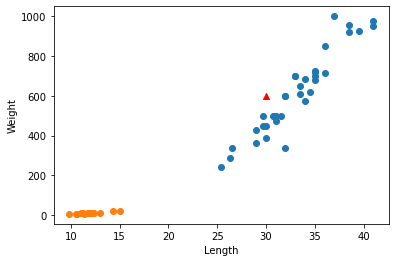

In [29]:
# 산포도로 예측 범위 확인하기

plt.scatter(apple.length,apple.weight)
plt.scatter(berry.length,berry.weight)
plt.scatter(30,600,marker='^',c='red')

plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()